## Bike Rides Analysis

### Connect to Strava API

https://github.com/hozn/stravalib  
https://pythonhosted.org/stravalib/usage/auth.html?highlight=my_strava_client_secret  
https://developers.strava.com/docs/reference/  
https://www.strava.com/settings/api

In [19]:
%%capture
from stravalib.client import Client
client = Client()
client.access_token = ""
athlete = client.get_athlete()
#print("For {id}, I now have an access token {token}".format(id=athlete.id, token=client.access_token))
#print("Current athlete: "+str(athlete))
#print("Activities: "+str(client.get_activities()))

In [ ]:
activities =client.get_activities()
sample = list(activities)[0]
sample.to_dict()

### Select columns of interst

In [4]:
cols =['name',
       'average_speed',
       'average_heartrate',
       'average_watts', 
       'distance',
       'elapsed_time',
       'total_elevation_gain',
       'type', 
       'start_date_local']

In [10]:
%%capture
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in my_cols])
    
import pandas as pd
df = pd.DataFrame(data, columns=my_cols)


## Start Time

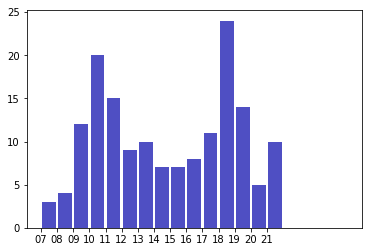

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
df["start_hour"] =  df["start_date_local"].apply(lambda x : datetime.strptime(x, "%Y-%m-%dT%H:%M:%S").strftime("%H"))

plt.hist(x=df.loc[df["type"]=="Ride",["start_hour"]], bins= range(int(df["start_hour"].min()), int(df["start_hour"].max())), color='#0504aa', alpha=0.7, rwidth=0.85);

# Late rides

In [49]:
df["start_hour_int"] = df["start_hour"].apply(lambda x: int(x))
df.loc[(df["type"]=="Ride") & (df["start_hour_int"] > 20), ['name',"start_date_local", "start_hour_int"]]
#df[df.start_hour > 21]

,name,start_date_local,start_hour_int
129,Indoor,2017-03-30T21:27:36,21
132,Indoor,2017-03-20T21:59:24,21
134,Indoor,2017-03-14T21:23:50,21
135,Indoor,2017-03-13T21:34:17,21
137,Indoor,2017-03-09T21:12:33,21
139,Indoor 4,2017-02-06T21:41:58,21
140,Indoor 3,2017-01-30T21:22:47,21
142,Indoor 1,2017-01-23T21:45:55,21
149,Bitzen,2016-08-05T21:28:47,21
155,Vom Badminton,2016-06-23T21:03:53,21
